In [3]:
!head Campo_ComaCluster_TP2024_Topicos.dat

# objID                 ra                   dec                  z             rp                   dV                   Mr                    gr                    C           dn4000      logSSFR       logSM       
  1237667783373815894   190.36509242025133   22.93077982861949    0.035670865   17.26313891690042    3771.2595981359486   -20.668733995090065   0.4301385027959519    2.1917648   1.337758    -9.822911     9.939624    
  1237667783914684423   200.29327450857346   22.691551278673664   0.031448953   16.695315905655725   2504.6858561038975   -21.08690946816583    0.7010758296076993    2.8515496   1.293469    -9.765995     10.571441   
  1237667910060867716   196.25274943634537   23.49141297002381    0.034404837   11.831493435744028   3391.450978517533    -20.35240821291448    0.7083040696870277    2.8152108   1.7430892   -11.745109    10.202046   
  1237668273507663949   199.06978528401143   20.5682888292296     0.022718353   14.026255439924718   114.49404090642899   -18.288184

In [31]:
# As we can see the dat file is simple enough to read, lets use numpy directly
import numpy as np

In [32]:
filename = 'Campo_ComaCluster_TP2024_Topicos.dat'
rawdata = np.loadtxt(filename)
# Simple enough then the header is as follows
header = np.array(["objID","ra","dec","z","rp","dV","Mr","gr","C","dn4000","logSSFR","logSM"])

In [33]:
rawdata.shape,header.shape

((3436, 12), (12,))

In [34]:
# lets move the data to an easily understandable dictionary for manipulation :D
# then delete the raw data array to save memory
data = {}
i = 0
for col in header:
    data[col] = rawdata[:,i]
    i += 1
print('dictionary created')
del rawdata
del header

dictionary created


In [46]:
data

{'objID': array([1.23766778e+18, 1.23766778e+18, 1.23766791e+18, ...,
        1.23766744e+18, 1.23766744e+18, 1.23766774e+18]),
 'ra': array([190.36509242, 200.29327451, 196.25274944, ..., 194.50649495,
        194.6576242 , 190.47107725]),
 'dec': array([22.93077983, 22.69155128, 23.49141297, ..., 27.48966584,
        27.46395368, 22.34880181]),
 'z': array([0.03567087, 0.03144895, 0.03440484, ..., 0.02543061, 0.0209099 ,
        0.02320768]),
 'rp': array([17.26313892, 16.69531591, 11.83149344, ...,  1.19052802,
         0.90078389, 11.96794387]),
 'dV': array([3771.25959814, 2504.6858561 , 3391.45097852, ...,  699.18423861,
         657.03116387,   32.30493486]),
 'Mr': array([-20.668734  , -21.08690947, -20.35240821, ..., -20.86004954,
        -19.00411459, -19.0197875 ]),
 'gr': array([0.4301385 , 0.70107583, 0.70830407, ..., 0.70748191, 0.63790145,
        0.56356677]),
 'C': array([2.1917648, 2.8515496, 2.8152108, ..., 2.7672927, 2.4587986,
        2.324248 ]),
 'dn4000': array(

In [18]:
# Now with the data loaded, we will probably need some visualization tools ;D
import matplotlib.pyplot as plt

In [49]:
# Some general Coma Cluster data
ra_coma = 194.9531
dec_coma = 27.9807
z_coma = 0.0231

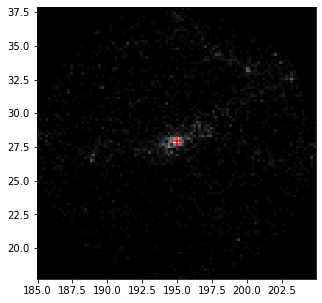

In [60]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.hist2d(data['ra'],data['dec'],weights=data['Mr'],bins=100,cmap='Greys')
ax.scatter(ra_coma,dec_coma,c='red',s=100,marker='+')
plt.show()

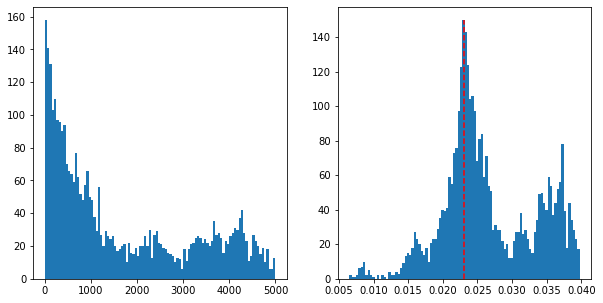

In [70]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].hist(data['dV'],bins=100)
axes[1].hist(data['z'],bins=100)
axes[1].plot(np.full(10,z_coma),np.linspace(0,150,10),'--r')
plt.show()